In [12]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

import numpy as np

import matplotlib.pyplot as plt

In [2]:
# import traceback
# import warnings
# import sys

# def warn_with_traceback(message, category, filename, lineno, file=None, line=None):

#     log = file if hasattr(file,'write') else sys.stderr
#     traceback.print_stack(file=log)
#     log.write(warnings.formatwarning(message, category, filename, lineno, line))

# warnings.showwarning = warn_with_traceback

In [3]:
from misloc_mispol_package.calc import BEM_simulation_wrapper as bem
from misloc_mispol_package.calc import fitting_misLocalization as fit
from misloc_mispol_package.calc import coupled_dipoles as cp
m_per_nm = fit.m_per_nm

from misloc_mispol_package.optics import diffraction_int as diffi

from misloc_mispol_package.optics import fibonacci as fib

hres_obs_pts = diffi.observation_points(-480*m_per_nm, 480*m_per_nm, -480*m_per_nm, 480*m_per_nm, 201)

In [4]:
# just_mols_i_want = [
#     np.vstack((
# #         fit.fixed_ori_mol_placement(mol_grid_pts_1D=5, x_max=125, y_max=125)[0][7] + [0, 0, 1],
#         fit.fixed_ori_mol_placement(mol_grid_pts_1D=5, x_max=125, y_max=125)[0][-1] + [0, 0, 1],
#         )),
#     0
#     ]

In [5]:
x = np.linspace(50, 350, 7)[:,None]

locations =  np.hstack((
    x, 
    np.zeros((x.shape[0], 2))
    )) + np.array([[0, 0, 1]])

In [6]:
locations = np.atleast_2d(locations[0])
locations

array([[50.,  0.,  1.]])

## Try 100 x 100 discretization of layer

In [7]:
# locations, angles = just_mols_i_want
simTestInst_few_mol_h = bem.SimulatedExperiment(locations, mol_angle=0, obs_points=hres_obs_pts)
simTestInst_few_mol_h.trial_images = simTestInst_few_mol_h.calculate_BEM_fields()

# simTestInst_few_mol_h.plot_mispol_map_wMisloc()

starting Matlab...
given even number of points for Fibonacci lattice, 
  adding 1...
1th molecule
calculating diffracted fields


In [8]:
simTestInst_few_mol_h.BEM_scattered_E

array([[ 7.70280159e-06+7.50078904e-06j, -2.63323804e-09+1.05278044e-08j,
         1.63466878e-07+2.49891747e-07j],
       [-1.30296689e+09+1.17331748e+09j, -3.64868565e+06-1.76076904e+06j,
        -4.62911713e+07+1.65926280e+07j],
       [-2.61084101e+09+2.37037434e+09j,  1.19352847e+07+7.00351795e+06j,
        -8.71117278e+07+4.84352943e+07j],
       ...,
       [            nan           +nanj,             nan           +nanj,
                    nan           +nanj],
       [            nan           +nanj,             nan           +nanj,
                    nan           +nanj],
       [            nan           +nanj,             nan           +nanj,
                    nan           +nanj]])

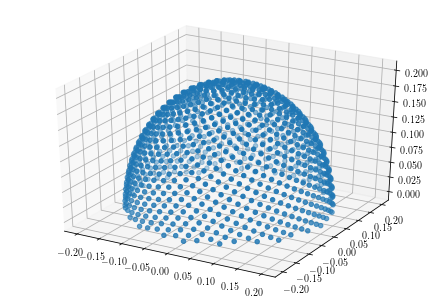

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*np.asarray(simTestInst_few_mol_h.matlab_cart_points_on_sph).T)

In [20]:
count = 0
index_list = []

for i, row in enumerate(simTestInst_few_mol_h.BEM_scattered_E):
    count+= (~np.isnan(row)).all()
    if (~np.isnan(row)).all():
        index_list.append(i)

In [21]:
count

10

In [22]:
index_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

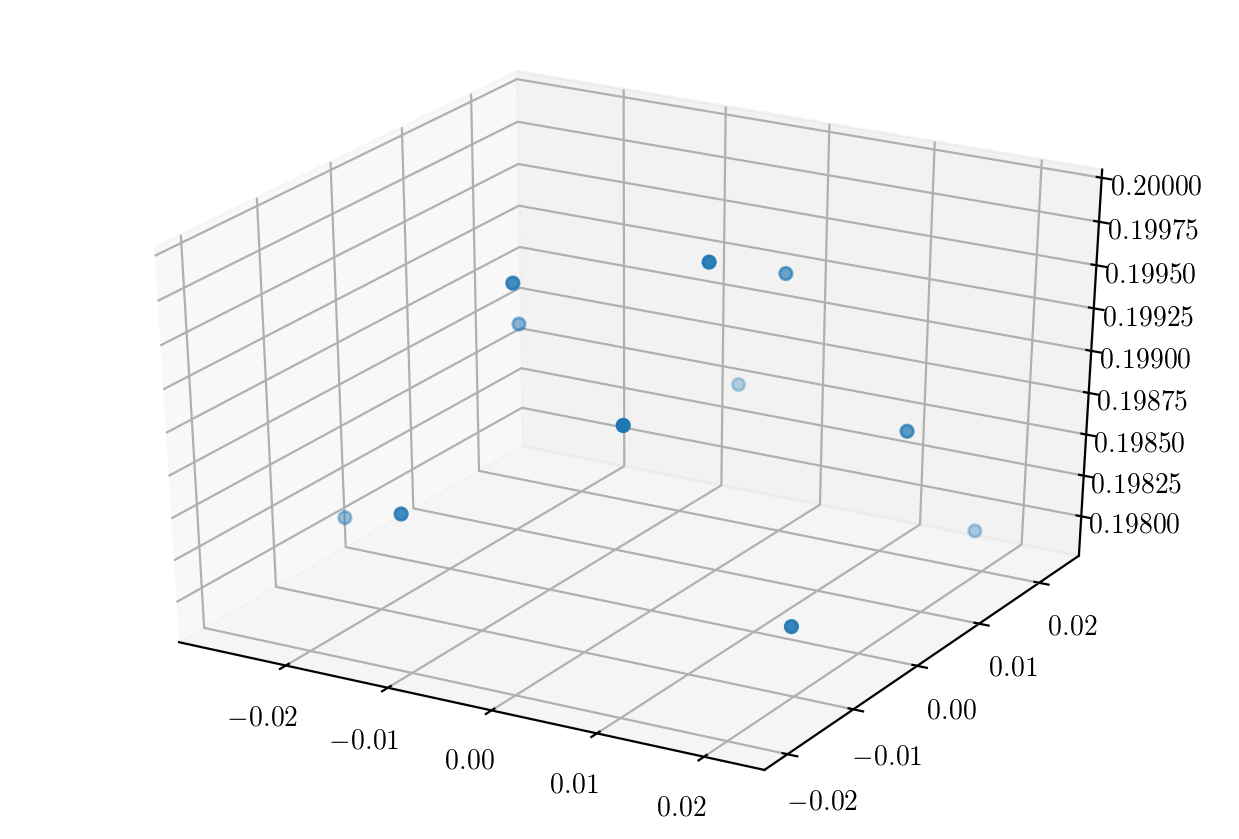

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(dpi=200)
ax = Axes3D(fig)
ax.scatter(*np.asarray(simTestInst_few_mol_h.matlab_cart_points_on_sph)[:11].T)

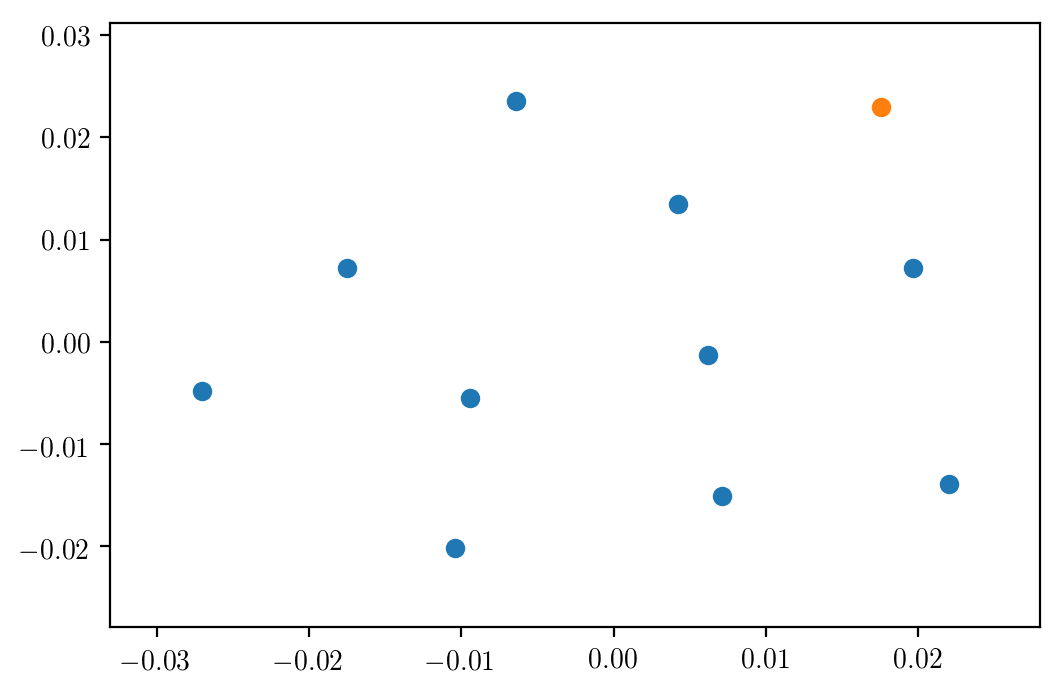

In [38]:
fig = plt.figure(dpi=200)
ax = plt.axes()
ax.scatter(*np.asarray(simTestInst_few_mol_h.matlab_cart_points_on_sph)[:10].T[[0,1]])
ax.scatter(*np.asarray(simTestInst_few_mol_h.matlab_cart_points_on_sph)[10].T[[0,1]])

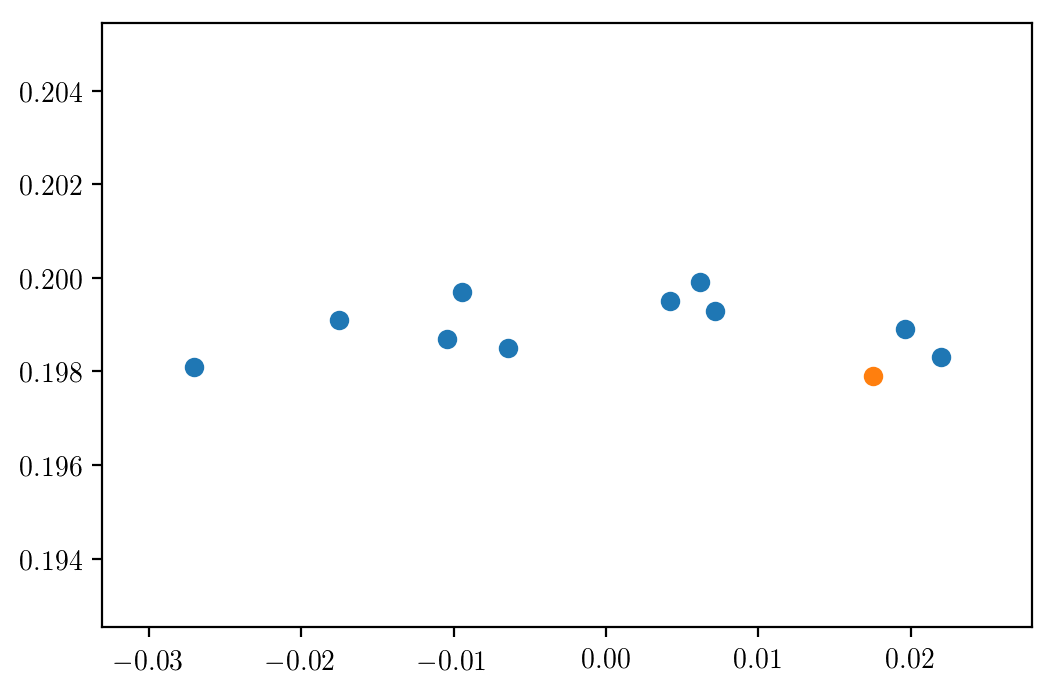

In [40]:
fig = plt.figure(dpi=200)
ax = plt.axes()
ax.scatter(*np.asarray(simTestInst_few_mol_h.matlab_cart_points_on_sph)[:10].T[[0,2]])
ax.scatter(*np.asarray(simTestInst_few_mol_h.matlab_cart_points_on_sph)[10].T[[0,2]])

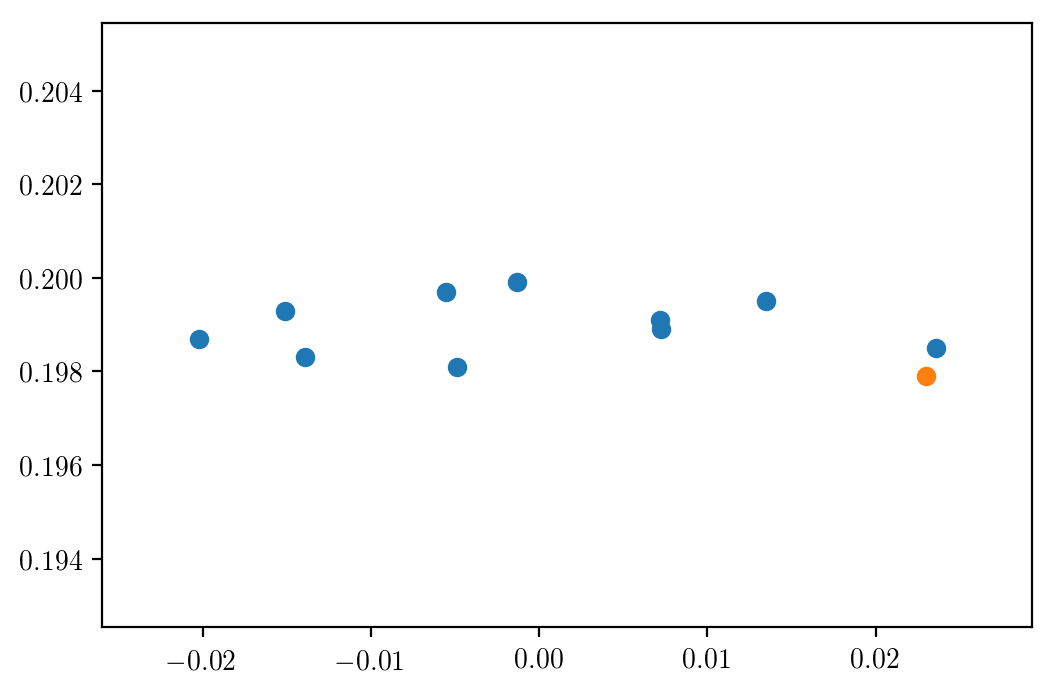

In [41]:
fig = plt.figure(dpi=200)
ax = plt.axes()
ax.scatter(*np.asarray(simTestInst_few_mol_h.matlab_cart_points_on_sph)[:10].T[[1,2]])
ax.scatter(*np.asarray(simTestInst_few_mol_h.matlab_cart_points_on_sph)[10].T[[1,2]])

In [27]:
simTestInst_few_mol_h.BEM_scattered_E[:11]

array([[ 7.70280159e-06+7.50078904e-06j, -2.63323804e-09+1.05278044e-08j,
         1.63466878e-07+2.49891747e-07j],
       [-1.30296689e+09+1.17331748e+09j, -3.64868565e+06-1.76076904e+06j,
        -4.62911713e+07+1.65926280e+07j],
       [-2.61084101e+09+2.37037434e+09j,  1.19352847e+07+7.00351795e+06j,
        -8.71117278e+07+4.84352943e+07j],
       [ 2.96893324e+45-2.59420872e+45j,  1.50578965e+43+1.14848077e+43j,
         9.17584604e+43-7.75590129e+43j],
       [ 6.42297444e+45-5.53662930e+45j, -1.02924062e+43-9.91821697e+42j,
         2.12326507e+44-1.05760393e+44j],
       [ 9.60313056e+45-8.44920431e+45j, -1.50102862e+43-1.44702954e+43j,
         2.85713279e+44-2.92141795e+44j],
       [ 1.29026588e+46-1.11666469e+46j,  8.85224727e+43+5.88223209e+43j,
         4.21027674e+44-2.43734334e+44j],
       [ 1.60546743e+46-1.39255812e+46j, -1.06514796e+44-8.10352812e+43j,
         5.19048849e+44-3.24852598e+44j],
       [ 1.90412589e+46-1.67764056e+46j,  9.34293518e+43+5.98798334e+43j

Looks like just the top points are making it though with non-nan

In [28]:

simTestInst_few_mol_h.drive_energy_eV

1.86

I don't know why these fields are so large, so I'm going to check the rod fields

In [9]:
rod_sim_inst = bem.SimulatedExperiment(
    locations, mol_angle=0, obs_points=hres_obs_pts, simulation_type='rod')
rod_sim_inst.trial_images = rod_sim_inst.calculate_BEM_fields()

starting Matlab...
given even number of points for Fibonacci lattice, 
  adding 1...
1th molecule
mol_location input to BEM function:
 [50.  0.  1.]

mol_orientation input to BEM function:
 [1.0, 0.0, 0.0]

matlab_cart_points_on_sph input to BEM function:
 [[0.006178564354578825,-0.0013399113790973762,0.1999000499750125],[-0.00945632732058466,-0.005516157496257257,0.19970014992503748],[0.004190411305023202,0.013494100669639622,0.19950024987506249],[0.007127394180134595,-0.01511855852251604,0.19930034982508749],[-0.01753462521216543,0.007179680913300796,0.19910044977511246],[0.01965082336039229,0.007239921290787325,0.19890054972513743],[-0.010433042687153884,-0.020228777495350632,0.19870064967516243],[-0.006412641923119016,0.02358665770736755,0.1985007496251874],[0.02198984025129061,-0.013900359113048386,0.1983008495752124],[-0.027061647162358624,-0.004866317915977015,0.19810094952523738],[0.017518146183454205,0.022984541998588626,0.19790104947526238],[0.0027292031639196217,-0.030113235

In [10]:
rod_sim_inst.bem_E

array([[[ 6.65326189e-09-4.72377055e-08j,
         -2.14296781e-09+1.52016007e-08j,
          1.30397426e-08+7.20989260e-10j],
        [ 6.88863995e-09-4.95744376e-08j,
         -2.58382234e-09+1.85330163e-08j,
          1.20073292e-08+4.93062260e-10j],
        [ 7.10320452e-09-5.17711814e-08j,
         -3.02100113e-09+2.18404012e-08j,
          1.09371838e-08+2.61132002e-10j],
        ...,
        [ 1.42592735e-08-9.66344264e-08j,
         -9.93373855e-09+7.75584479e-08j,
          1.05456956e-08+6.01238123e-11j],
        [ 1.41847791e-08-9.63412578e-08j,
         -9.52517998e-09+7.49529763e-08j,
          8.98432388e-09-1.56898922e-10j],
        [ 1.40734217e-08-9.58022850e-08j,
         -9.10074772e-09+7.22284978e-08j,
          7.44027520e-09-3.68918428e-10j]]])

In [13]:
with np.printoptions(precision=3, suppress=False, threshold=np.inf):
    print(simTestInst_few_mol_h.trial_images[0])

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

In [16]:
sphere_points = fib.fib_alg_k_filter(
    num_points=bem.lens_points,
    max_ang=bem.max_theta
    )
# Convert spherical coordinates to Caresian.
cart_points_on_sph = fib.sphere_to_cart(
    sphere_points[:,0],
    sphere_points[:,1],
    bem.obj_f*np.ones(np.shape(sphere_points[:,0]))
    )

given even number of points for Fibonacci lattice, 
  adding 1...


In [18]:
cart_points_on_sph

array([[ 6.17856435e-03, -1.33991138e-03,  1.99900050e-01],
       [-9.45632732e-03, -5.51615750e-03,  1.99700150e-01],
       [ 4.19041131e-03,  1.34941007e-02,  1.99500250e-01],
       ...,
       [ 1.74851100e-02, -1.99233810e-01,  3.99800100e-04],
       [-1.47473702e-01,  1.35097991e-01,  1.99900050e-04],
       [ 2.00000000e-01,  0.00000000e+00,  1.22464680e-17]])

In [ ]:
# Model fit
# Gaussian guess, checked

test_BEM_fit_instance_few_mol_h_100 = fit.FitModelToData(
    simTestInst_few_mol_h_100.BEM_images, 
#     ini_guess=simTestInst_few_mol.mol_locations,
    ini_guess='gauss',
    obs_points=hres_obs_pts
    )
test_BEM_fit_few_mol_h_100 = test_BEM_fit_instance_few_mol_h_100.fit_model_to_image_data(
    check_ini=True)

## Plot fit results
test_BEM_fit_instance_few_mol_h_100.plot_fit_results_as_quiver_map(simTestInst_few_mol_h_100)   

Save datas

In [ ]:
# bem.save_fit_inst(test_BEM_fit_instance_few_mol_h_100, simTestInst_few_mol_h_100, 'fig5/')
bem.save_sim_exp_inst(simTestInst_few_mol_h_100, 'fig5/sim/')


Test load

In [ ]:
loaded_fit_inst = bem.LoadedFit('fig5/fig5')

In [ ]:
fig5 = bem.fig5(simTestInst_few_mol_h_100, test_BEM_fit_instance_few_mol_h_100, draw_quadrant=True)

modifying plotting function to suit Julie's requests

In [ ]:
fig5.savefig('fig5.pdf', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

In [ ]:
simTestInst_few_mol_h_100.BEM_images

In [ ]:
simTestInst_few_mol_h_100.BEM_images.shape

In [ ]:
test_BEM_fit_instance_few_mol_h_100.model_fit_results

In [ ]:

import matplotlib.pyplot as plt
import matplotlib as mpl

# inspired by http://nipunbatra.github.io/2014/08/latexify/
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'magma',
    'axes.grid': False,
#     'savefig.dpi': 150,  # to adjust notebook inline plot size
    'axes.labelsize': 8, # fontsize for x and y labels (was 10)
    'axes.titlesize': 8,
    'font.size': 8, # was 10
    'legend.fontsize': 6, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
    'figure.figsize': [3.39, 2.10],
    'font.family': 'serif',
    'figure.max_open_warning':10001
}
mpl.rcParams.update(params)

## For colorbar 
from mpl_toolkits.axes_grid1 import make_axes_locatable
#         ## Add colorbar
#         divider = make_axes_locatable(axs[ax_idx])
#         cax1 = divider.append_axes("right", size="5%", pad=0.05)
#         fig.colorbar(img1, cax=cax1)


In [ ]:
simTestInst_few_mol_h_100.BEM_images[i].shape

In [ ]:
import scipy.optimize as opt

In [ ]:
def gauss_from_params(
    params,
#     resolution=None,
    ):
    """ 
        Args
        ----
        
        params = [
            d=[x, y, z], : mol location relative to plasmon
            phi, : mole angle
            ]
    
        """
    dx = params[0]
    dy = params[1]
    phi = params[2]
    
#     if resolution is None:
#         obs_pts = None
#     else:
    obs_pts = hres_obs_pts
        
#     cp_inst=cpc.CoupledDipoles(obs_points=obs_pts)
    raveled_image = fit.FittingTools.twoD_Gaussian(None, 
        (obs_pts[1]/m_per_nm, obs_pts[2]/m_per_nm), ## tuple of meshed (x,y) values
        *params
        )
    
    raveled_image = raveled_image.ravel()
    
    return raveled_image
    
    
def fit_image_w_gaussian(image, ini_guess_params=None):
    """
        """
    data = image
    model = lambda params: gauss_from_params(params)
    
#     cost_func = 
    if ini_guess_params is None: 
        ini_guess_params = (1, 100, 100, 100, 100, 0, 0)
    
    fit_result = opt.least_squares(
        lambda fit_params: (
            data.ravel()/data.max() 
            - 
            model(fit_params).ravel()/ model(fit_params).max()
            ),
        ini_guess_params,
#         x_scale=[1E2,1E2,1],
        loss='soft_l1'
        )
    
    return fit_result


In [ ]:
gauss_fit_result = []


for i, image in enumerate(simTestInst_few_mol_h_100.BEM_images):


    gauss_fit_result.append(fit_image_w_gaussian(image))


# ## Fit Gaussian
# gauss_fit_result.append( 
#     gauss_fit_inst.fit_model(
#         np.asarray([
#             simTestInst_few_mol_h_100.BEM_images[i].reshape(201,201)
#             ]),
#         )
#    )
    

In [ ]:
gauss_fit_result[0]['x']

In [248]:
# Draw the rod and ellipse
import matplotlib as mpl
curly_nanorod_color = (241/255, 223/255, 182/255)
curly_nanorod_color_light = (241/255, 223/255, 182/255, 0.5)

def draw_rod(ax, xy_coords, color=curly_nanorod_color):
    
    out_circle = mpl.patches.Circle(
        (xy_coords[1]+0, xy_coords[0]+24),
        22,
        # facecolor='Gold',
        facecolor='k',
        edgecolor='Black',
        linewidth=0,
        )
    out_bot_circle = mpl.patches.Circle(
        (xy_coords[1]-0, xy_coords[0]-24),
        22,
        # facecolor='Gold',
        facecolor='k',
        edgecolor='Black',
        linewidth=0,
        )
    out_rect = mpl.patches.Rectangle(
        (xy_coords[1]-22,xy_coords[0]-24),
        44,
        48,
        angle=0.0,
        # facecolor='Gold',
        facecolor='k',
        edgecolor='Black',
        linewidth=0,
        )
    
    circle = mpl.patches.Circle(
        (xy_coords[1]+0, xy_coords[0]+24),
        20,
        # facecolor='Gold',
        facecolor=color,
        edgecolor='Black',
        linewidth=0,
        )
    bot_circle = mpl.patches.Circle(
        (xy_coords[1]-0, xy_coords[0]-24),
        20,
        # facecolor='Gold',
        facecolor=color,
        edgecolor='Black',
        linewidth=0,
        )
    rect = mpl.patches.Rectangle(
        (xy_coords[1]-19.75,xy_coords[0]-24),
        40.5,
        48,
        angle=0.0,
        # facecolor='Gold',
        facecolor=color,
        edgecolor='Black',
        linewidth=0,
        )
    # for piece in rod:
    ax.add_patch(out_circle)
    ax.add_patch(out_bot_circle)
    ax.add_patch(out_rect)
    
    ax.add_patch(circle)
    ax.add_patch(bot_circle)
    ax.add_patch(rect)
    
    return ax

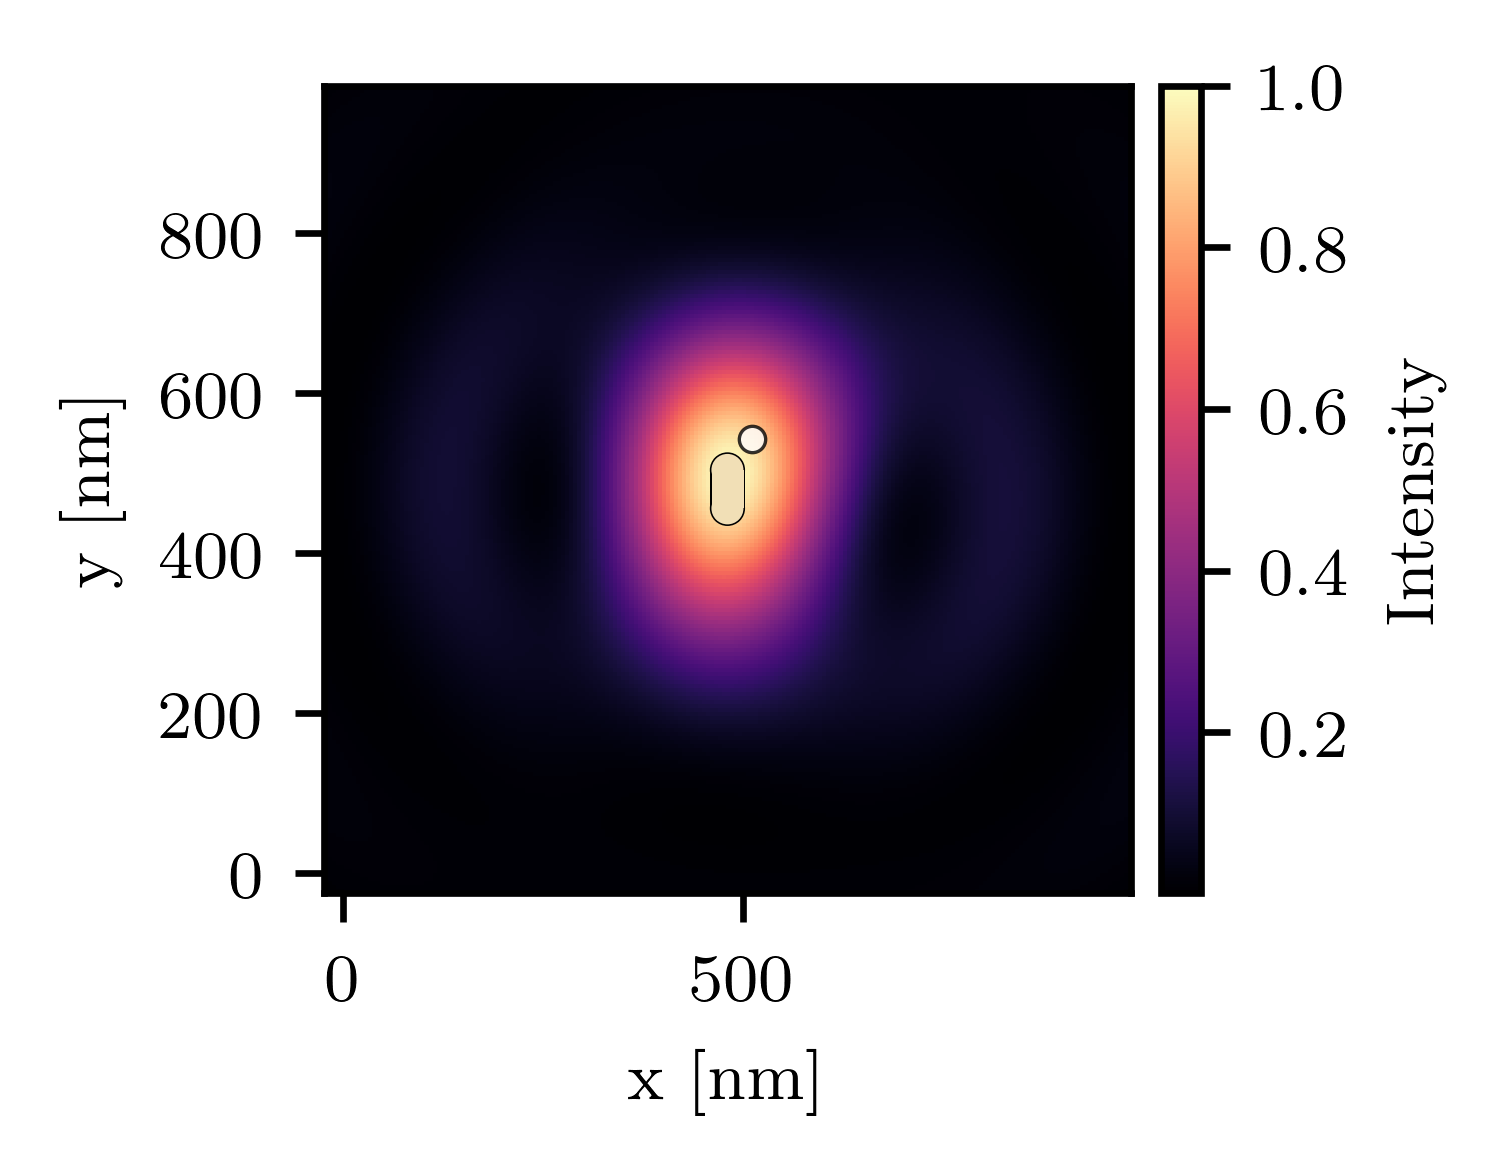

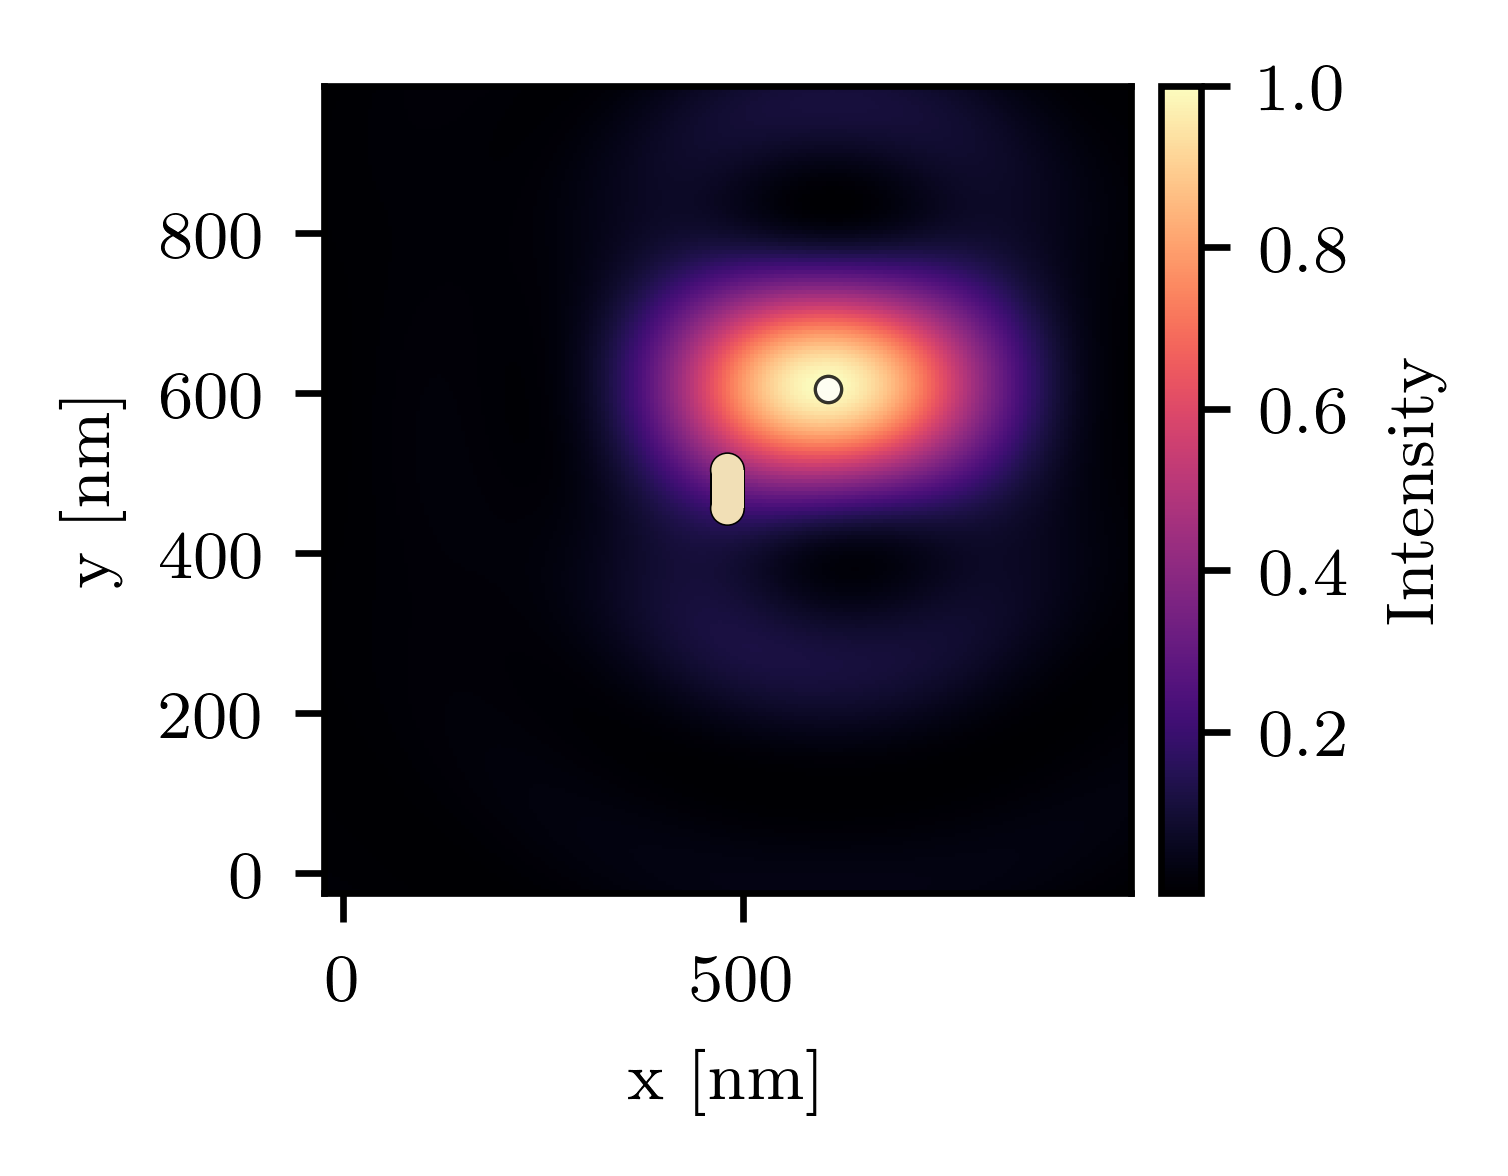

In [249]:

for i in [0, 1]:

    fig, axs = plt.subplots(
        ncols=1,
        dpi=600,
        figsize=(6,2)
        )

    img1 = axs.imshow(
        simTestInst_few_mol_h_100.BEM_images[i].reshape(201,201).T/simTestInst_few_mol_h_100.BEM_images[i].max(),
        origin='lower',
        extent=[0-48/2, 48*21-48/2, 0-48/2, 48*21-48/2]
        )

    ## Add colorbar
    divider = make_axes_locatable(axs)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img1, cax=cax1, label='Intensity')

    axs.set_xlabel('x [nm]')
    axs.set_ylabel('y [nm]')

    plt.tight_layout(h_pad=1)


#     axs.contour(
#         np.linspace(0,48*(21-1),201),
#         np.linspace(0,48*(21-1),201),
#         fit.FittingTools.twoD_Gaussian(
#             None,
#             (hres_obs_pts[1]/m_per_nm, hres_obs_pts[2]/m_per_nm),
#             *gauss_fit_result[i]['x']
#             ).reshape(hres_obs_pts[1].shape),
#         cmap='Wistia',
#         linewidths=0.5,
#         levels=4
#         )
    
    ## scatter mol position
    axs.scatter(
        simTestInst_few_mol_h_100.mol_locations[i][0]+480,
        simTestInst_few_mol_h_100.mol_locations[i][1]+480,
        s = 10,
        c='w',
        alpha=.8,
        edgecolor='k',
        linewidth=.4
        )

    draw_rod(axs, [480,480])

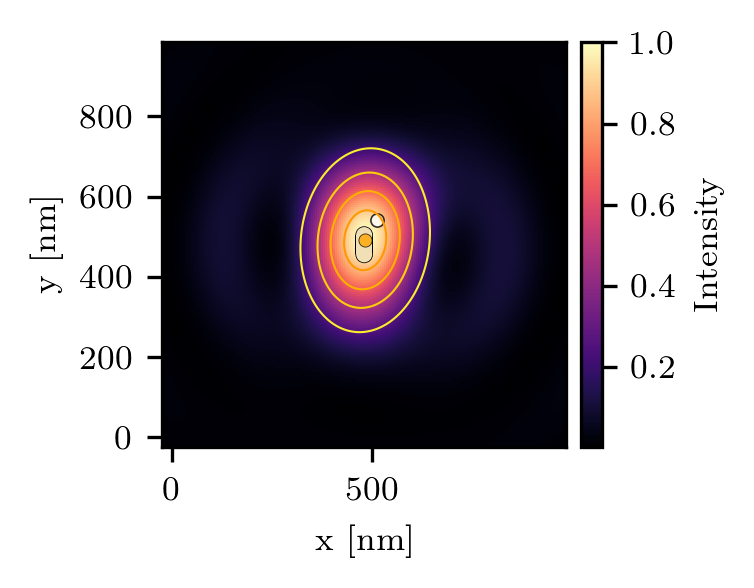

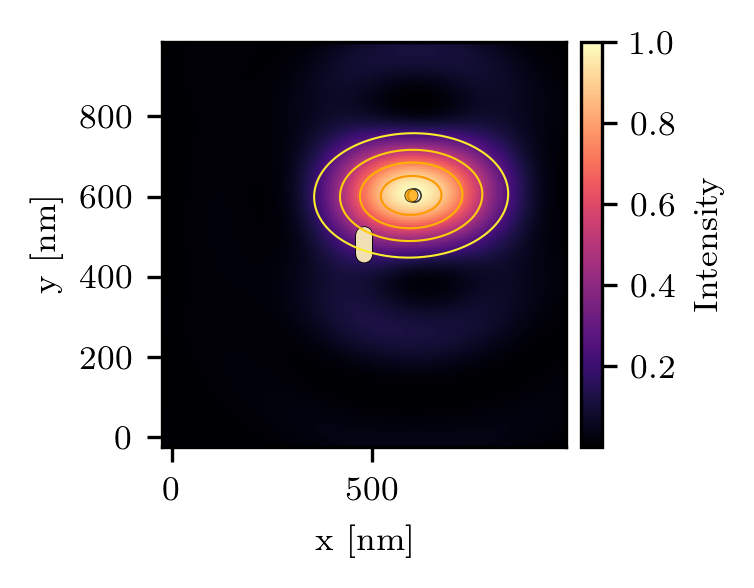

In [235]:

for i in [0, 1]:

    fig, axs = plt.subplots(
        ncols=1,
        dpi=300,
        figsize=(6,2)
        )

    img1 = axs.imshow(
        simTestInst_few_mol_h_100.BEM_images[i].reshape(201,201).T/simTestInst_few_mol_h_100.BEM_images[i].max(),
        origin='lower',
        extent=[0-48/2, 48*21-48/2, 0-48/2, 48*21-48/2]
        )

    ## Add colorbar
    divider = make_axes_locatable(axs)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img1, cax=cax1, label='Intensity')

    axs.set_xlabel('x [nm]')
    axs.set_ylabel('y [nm]')
    plt.tight_layout(h_pad=1)


    axs.contour(
        np.linspace(0,48*(21-1),201),
        np.linspace(0,48*(21-1),201),
        fit.FittingTools.twoD_Gaussian(
            None,
            (hres_obs_pts[2]/m_per_nm, hres_obs_pts[1]/m_per_nm,),
            *gauss_fit_result[i]['x']
            ).reshape(hres_obs_pts[1].shape),
        cmap='Wistia',
        linewidths=0.5,
        levels=4
        )
    
    ## scatter gaussian position
    axs.scatter(
        gauss_fit_result[i]['x'][1]+480,
        gauss_fit_result[i]['x'][2]+480,
        s = 10,
        c='orange',
        alpha=.8,
        edgecolor='k',
        linewidth=.2,
        zorder=5
        )
    
        ## scatter mol position
    axs.scatter(
        simTestInst_few_mol_h_100.mol_locations[i][0]+480,
        simTestInst_few_mol_h_100.mol_locations[i][1]+480,
        s = 10,
        c='w',
        alpha=.8,
        edgecolor='k',
        linewidth=.4
        )

    draw_rod(axs, [480,480])

In [237]:
def image_from_params(
    params, 
    plas_loc,
    resolution=None,
    ):
    """ 
        Args
        ----
        
        params = [
            d=[x, y, z], : mol location relative to plasmon
            phi, : mole angle
            ]
    
        """
    dx = params[0]
    dy = params[1]
    phi = params[2]
    
    if resolution is None:
        obs_pts = None
    else:
        obs_pts = diffi.observation_points(
            0, 48*20*m_per_nm, 0, 48*20*m_per_nm, resolution)
        
    cp_inst=CoupledDipoles(obs_points=obs_pts)
    field_output = cp_inst.dipole_fields(
            np.array([[dx, dy, 0]]), 
            mol_angle=phi, 
            plas_angle=0, 
            plas_centroid=np.array([plas_loc])
            )
    raveled_image = cp_inst.image_from_E(field_output[0]+field_output[1])
    
    return raveled_image
    
    
def fit_image_w_coupled_model(image, plas_loc, ini_guess_params=None):
    """
        """
    data = image
    model = lambda params: image_from_params(params, plas_loc)
    
#     cost_func = 
    if ini_guess_params is None: 
        ini_guess_params = (100, 100, 0)
    
    fit_result = opt.least_squares(
        lambda fit_params: (
            data.ravel()/data.max() 
            - 
            model(fit_params).ravel()/ model(fit_params).max()
            ),
        ini_guess_params,
        x_scale=[1E2,1E2,1],
        loss='soft_l1'
        )
    
    return fit_result


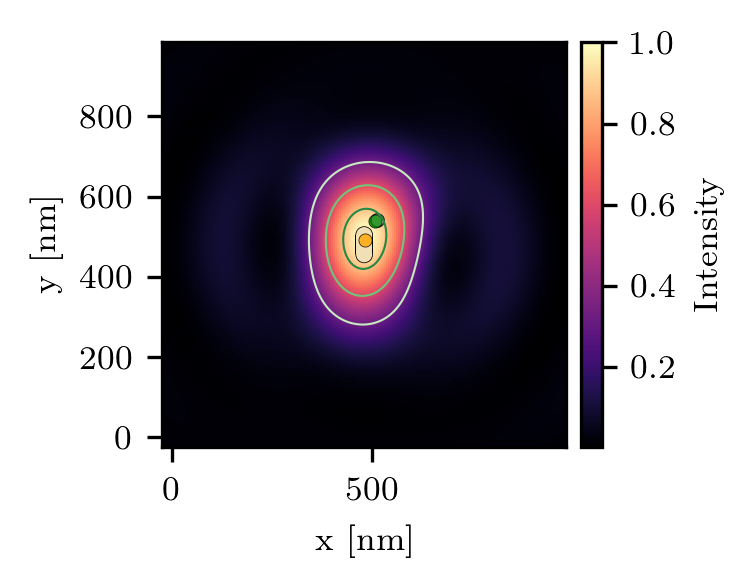

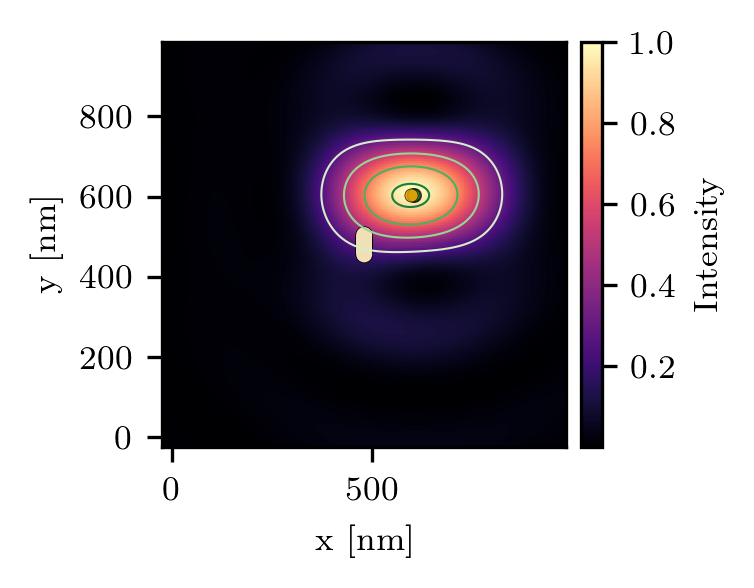

In [240]:
## Fit model
for i in [0, 1]:

    fig, axs = plt.subplots(
        ncols=1,
        dpi=300,
        figsize=(6,2)
        )

    img1 = axs.imshow(
        simTestInst_few_mol_h_100.BEM_images[i].reshape(201,201).T/simTestInst_few_mol_h_100.BEM_images[i].max(),
        origin='lower',
        extent=[0-48/2, 48*21-48/2, 0-48/2, 48*21-48/2]
        )

    ## Add colorbar
    divider = make_axes_locatable(axs)
    cax1 = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img1, cax=cax1, label='Intensity')

    axs.set_xlabel('x [nm]')
    axs.set_ylabel('y [nm]')

    plt.tight_layout(h_pad=1)


    axs.contour(
        np.linspace(0,48*(21-1),201),
        np.linspace(0,48*(21-1),201),
        test_BEM_fit_instance_few_mol_h_100.raveled_model_of_params(
            test_BEM_fit_instance_few_mol_h_100.model_fit_results[i],
            ).reshape(hres_obs_pts[1].shape).T,
        cmap='Greens',
        linewidths=0.5,
        levels=4
        )

        ## scatter mol position
    axs.scatter(
        simTestInst_few_mol_h_100.mol_locations[i][0]+480,
        simTestInst_few_mol_h_100.mol_locations[i][1]+480,
        s = 10,
        c='w',
        alpha=.8,
        edgecolor='k',
        linewidth=.4
        )
    
    ## scatter gaussian position
    axs.scatter(
        test_BEM_fit_instance_few_mol_h_100.model_fit_results[i][0]+480,
        test_BEM_fit_instance_few_mol_h_100.model_fit_results[i][1]+480,
        s = 10,
        c='green',
        alpha=.8,
        edgecolor='k',
        linewidth=.2
        )
    
    ## scatter gaussian position
    axs.scatter(
        gauss_fit_result[i]['x'][1]+480,
        gauss_fit_result[i]['x'][2]+480,
        s = 10,
        c='orange',
        alpha=.8,
        edgecolor='k',
        linewidth=.2,
        zorder=5
        )

    draw_rod(axs, [480,480])